

# Project: Investigate a Dataset - [No-show appointments (original source on Kaggle)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
#### 1- Which gender is more concerned about their health?
#### 2- Does recieving a SMS affect the No-show rate?

In [79]:
# libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb


<a id='wrangling'></a>
## Data Wrangling

> Investegate the data and show the terms to be handeled 




In [80]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("no_show_appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [81]:
# Show the shape of the data
df.shape


(110527, 14)

The data have 110527 rows and 14 columns

In [82]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no empty cells

In [83]:
# describe the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is no sense that min age to be -1 
It will be removed in the data cleaning section 

In [84]:
# To get the row of '-1' value
row = df.query('Age =="-1"')
row 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It is the row to be removed later

In [85]:
# Check for duplications
df.duplicated().sum()

0

There are no duplicated cells


### Data Cleaning
#### Here the problems found will be cleaned 
 

In [86]:
# After discussing the structure of the data and any problems that need to be
#  cleaned, perform those cleaning steps in the second part of this section.

# remove the row of age = '-1' 
df.drop(index = 99832, inplace = True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now, the problem is solved and the min age =0 

To make sure that the '-1' age row is removed
By re-using the .info() function 

In [87]:
df.shape

(110526, 14)

There are 110526 instead of 110527

In [88]:
# To handel some spelling errors
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [89]:
# copy the dataframe and drop the unused columns from the dataset to analyse it
dataset = df.copy()
dataset.drop(labels = ['PatientId','AppointmentID', 'ScheduledDay'],axis =1,inplace =True)
dataset.head(12)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Which gender is more concerned about their health?

In [90]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#function to take any column and keep tracking of it. 
def count(column):
   
    count = dataset[column].str.cat(sep =' ')
    #using pandas series then storing the values 
    count = pd.Series(count.split())
    
    #counting and put the values in decreasing order
    number = count.value_counts(ascending = False)
    
    return number

In [91]:
gender = count('Gender')
gender

F    71839
M    38687
dtype: int64

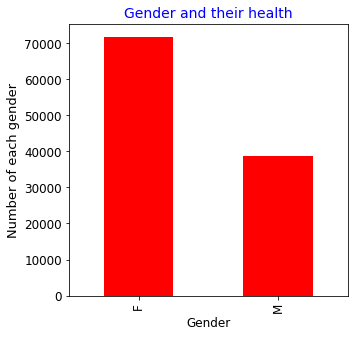

In [92]:
#plot the results
bar = gender.plot.bar(color = 'red', fontsize = 12)

#plot size(width, height)
bar.figure.set_size_inches(5, 5);

#Set the labels
plt.title('Gender and their health', color = 'blue', fontsize = '14')
plt.xlabel('Gender', color = 'black', fontsize = '12')
plt.ylabel('Number of each gender', color = 'black', fontsize = '13');

It shows that females are more concerned about their health than males .

### Research Question 2  (Does recieving a SMS affect the No-show rate?)

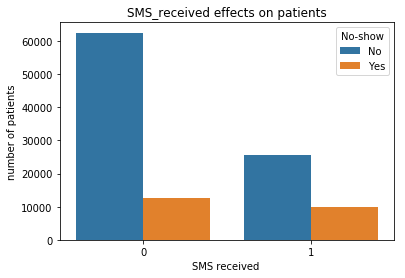

In [93]:
# show the effect of sending a sms on No-show rate 
sms = snb.countplot(x = 'SMS_received', hue = 'No-show', data = dataset, tick_label=['not_received', 'received'])

#Set the labels
sms.set_title('SMS_received effects on patients')
plt.xlabel('SMS received ')
plt.ylabel('number of patients')
plt.show()


It seems that people who did not receive SMS to notify them of the appointment attended more than those who received the SMS.  


### Reserach question 3: To what extent does age affect the number of No-Show rate?

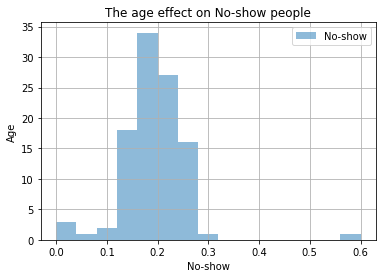

In [94]:
#convert 'Yes' & 'No' to 1 and 0
dataset['No-show'] = dataset['No-show'].map({'Yes': 1, 'No': 0})

# groupby is used to show the effect of the age
dataset.groupby('Age')['No-show'].mean().hist(alpha=0.5, bins=15, label ='No-show');

# Set the labels
plt.xlabel('No-show')
plt.ylabel('Age')
plt.title('The age effect on No-show people')
plt.legend()



Graph shows that No-show rate depends on age
As the rate of cancellation of appointments at the age of young people is greater than that of the elderly

<a id='conclusions'></a>
## Conclusions

- Females are more concerned about their health than males.
- It is not neccessary to send SMS messages as a reminder.
- Older patients is more likely to show up than younger.

### Limitations
- Dropping a row with a non correct value 
- Maybe the findings will change at a sertain period of the year.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0